# Classificação de Imagens Dentárias - Panoramic Dental Dataset
Este projeto utiliza o dataset Panoramic Dental Dataset  para carregar, pré-processar, treinar e avaliar um modelo de classificação de imagens dentárias usando convolução neural (CNN). Abaixo está uma descrição detalhada de cada etapa do processo e o código correspondente.






*  Aqui estamos apenas fazendo alguns testes com kaggle para ver se está funcionando


In [ ]:

#configurando a autenticação para conseguir acessar o kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# confirmar se está funcionando o kaggle
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
#baixando dataset
!kaggle datasets download thunderpede/panoramic-dental-dataset


Dataset URL: https://www.kaggle.com/datasets/thunderpede/panoramic-dental-dataset
License(s): other
 92% 225M/244M [00:02<00:00, 87.2MB/s]
100% 244M/244M [00:02<00:00, 85.8MB/s]


In [ ]:
#descompactando dataset
!unzip panoramic-dental-dataset.zip -d ./datasets


Archive:  panoramic-dental-dataset.zip
  inflating: ./datasets/annotations/bboxes_caries/1008.txt  
  inflating: ./datasets/annotations/bboxes_caries/1009.txt  
  inflating: ./datasets/annotations/bboxes_caries/1016.txt  
  inflating: ./datasets/annotations/bboxes_caries/1018.txt  
  inflating: ./datasets/annotations/bboxes_caries/1026.txt  
  inflating: ./datasets/annotations/bboxes_caries/1033.txt  
  inflating: ./datasets/annotations/bboxes_caries/1042.txt  
  inflating: ./datasets/annotations/bboxes_caries/1050.txt  
  inflating: ./datasets/annotations/bboxes_caries/1058.txt  
  inflating: ./datasets/annotations/bboxes_caries/1067.txt  
  inflating: ./datasets/annotations/bboxes_caries/1074.txt  
  inflating: ./datasets/annotations/bboxes_caries/1080.txt  
  inflating: ./datasets/annotations/bboxes_caries/1083.txt  
  inflating: ./datasets/annotations/bboxes_caries/1088.txt  
  inflating: ./datasets/annotations/bboxes_caries/1090.txt  
  inflating: ./datasets/annotations/bboxes_car

# **1. Listar Arquivos de Imagem**
Nesta etapa, verificamos se o diretório das imagens foi carregado corretamente e listamos os primeiros arquivos para garantir que os dados estão disponíveis.


* os.listdir(): Lista todos os arquivos em um diretório especificado.
*   print(): Exibe os primeiros 10 arquivos para verificar se as imagens foram carregadas corretamente.



In [ ]:
import os

# Definindo o caminho correto para as imagens
image_dir = '/content/datasets/images'
image_files = os.listdir(image_dir)

# Exibindo os primeiros 10 arquivos de imagem
print(image_files[:10])

['867.png', '783.png', '395.png', '323.png', '939.png', '372.png', '837.png', '861.png', '1058.png', '706.png']


# **2. Verificar Arquivos de Rótulos**

Caso o dataset contenha rótulos (labels) em formato CSV ou outro formato, verificamos se o diretório correto contém esses arquivos e os listamos.



*   os.path.exists(): Verifica se o diretório especificado de rótulos existe.
*   os.listdir(): Lista os arquivos de rótulos, caso eles existam.



In [ ]:
# Definindo o caminho para os rótulos
label_dir = '/content/datasets/labels'  # ou '/content/datasets/labels_cut'
if os.path.exists(label_dir):
    label_files = os.listdir(label_dir)
    print("Arquivos de rótulos:", label_files)
else:
    print("Diretório de rótulos não encontrado.")

Arquivos de rótulos: ['867.png', '783.png', '395.png', '323.png', '939.png', '372.png', '837.png', '861.png', '1058.png', '706.png', '702.png', '750.png', '347.png', '1009.png', '1018.png', '1042.png', '1050.png', '710.png', '350.png', '810.png', '842.png', '748.png', '819.png', '777.png', '812.png', '736.png', '306.png', '1033.png', '376.png', '804.png', '755.png', '1026.png', '1083.png', '369.png', '913.png', '883.png', '365.png', '715.png', '1016.png', '859.png', '895.png', '925.png', '942.png', '318.png', '383.png', '857.png', '370.png', '822.png', '866.png', '934.png', '1074.png', '761.png', '360.png', '378.png', '818.png', '759.png', '354.png', '1091.png', '784.png', '708.png', '769.png', '963.png', '396.png', '793.png', '872.png', '981.png', '1080.png', '885.png', '1067.png', '714.png', '758.png', '786.png', '1008.png', '1096.png', '952.png', '740.png', '901.png', '724.png', '996.png', '367.png', '875.png', '392.png', '790.png', '935.png', '1092.png', '814.png', '388.png', '310.

# **3. Pré-processamento das Imagens**

Nesta etapa, carregamos e pré-processamos as imagens, ajustando o tamanho e normalizando os valores dos pixels para alimentar o modelo de rede neural.



*   load_img(): Carrega uma imagem do diretório especificado e ajusta o tamanho para 224x224 pixels.

*   img_to_array(): Converte a imagem em um array de pixels.



*   img_array /= 255.0: Normaliza os valores dos pixels para que fiquem entre 0 e 1, o que melhora a performance do treinamento do modelo.



In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalizando os valores dos pixels
    return img_array

# Carregar todas as imagens
image_data = []
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    image_data.append(preprocess_image(img_path))

# Converter para um array numpy
image_data = np.array(image_data)
print(f"Imagens carregadas: {image_data.shape}")


Imagens carregadas: (100, 224, 224, 3)


#**4. Carregar Rótulos (Labels)**

Carregar os rótulos das imagens (se existirem) de um arquivo CSV para vinculá-los aos dados de imagem.

* pd.read_csv(): Carrega o arquivo CSV que contém os rótulos das imagens.

* labels_df.head(): Mostra as primeiras 5 linhas do arquivo CSV para garantir que os rótulos foram carregados corretamente.

In [ ]:
import pandas as pd

# Se houver um arquivo CSV com rótulos
label_file = '/content/datasets/labels/labels.csv'
if os.path.exists(label_file):
    labels_df = pd.read_csv(label_file)
    print(labels_df.head())
else:
    print("Arquivo de rótulos CSV não encontrado.")


Arquivo de rótulos CSV não encontrado.


# **5. Dividir Dataset em Conjunto de Treinamento e Validação**

Dividimos os dados em dois conjuntos: um para treinamento do modelo e outro para validação, garantindo que o modelo não super ajuste nos dados de treino.

* train_test_split(): Divide o dataset em dois conjuntos (treinamento e validação) com uma proporção de 80% para treino e 20% para validação.

* random_state=42: Garante que a divisão seja a mesma toda vez que o código for executado.

In [ ]:
from sklearn.model_selection import train_test_split


labels = np.array([0 if 'normal' in img else 1 for img in image_files])

X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

print(f"Imagens de treino: {X_train.shape}, Rótulos de treino: {y_train.shape}")
print(f"Imagens de validação: {X_val.shape}, Rótulos de validação: {y_val.shape}")


Imagens de treino: (80, 224, 224, 3), Rótulos de treino: (80,)
Imagens de validação: (20, 224, 224, 3), Rótulos de validação: (20,)


# **6. Criar o Modelo de Classificação**
Construímos um modelo de rede neural convolucional (CNN) para classificar as imagens com base nos dados de entrada.

* Camadas Conv2D e MaxPooling2D: Extraem características das imagens. As camadas de pooling reduzem a dimensionalidade.

* Flatten(): Achata a saída da camada convolucional para uma única dimensão, tornando-a adequada para a camada densa.

* Dense(): Cria camadas densas para classificação.

* Dropout(): Previne o overfitting, desligando aleatoriamente neurônios durante o treinamento.

* Sigmoid(): Ativação final para classificação binária (0 ou 1).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Criando o modelo de classificação
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Para classificação binária

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

* layer: Inclui camadas de convolução, pooling, flatten (achatamento), e camadas densas (fully connected), além de dropout para evitar overfitting.

* Output Shape: Mostra as dimensões da saída de cada camada.


* Parâmetros treináveis: Exibe o número de parâmetros (pesos e biases) que são ajustados durante o treinamento.

# **7. Treinar o Modelo**

Treinamos o modelo com os dados de treino e validamos o desempenho durante o processo.

* model.fit(): Executa o treinamento do modelo por 10 épocas, usando o conjunto de validação para medir a performance em cada época.

In [ ]:
# Treinando o modelo
treinamento = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8383 - loss: 0.3776 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 1.0000 - loss: 2.5911e-35 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 5.7562e-38 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0000e+

# **8. Avaliar o Modelo**
Avaliamos o modelo nos dados de validação para ver quão bem ele generaliza os dados que não foram vistos durante o treinamento.

* model.evaluate(): Avalia o desempenho do modelo usando os dados de validação.
* accuracy: Mede a precisão do modelo.

In [ ]:
# Avaliar o modelo no conjunto de validação
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Acurácia no conjunto de validação: {accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Acurácia no conjunto de validação: 1.00


# **9. Visualizar o Desempenho**

Visualizamos as métricas de desempenho (como acurácia) ao longo das épocas de treinamento.

* history.history['accuracy']: Acurácia obtida ao longo das épocas no conjunto de treino.

* history.history['val_accuracy']: Acurácia obtida no conjunto de validação.

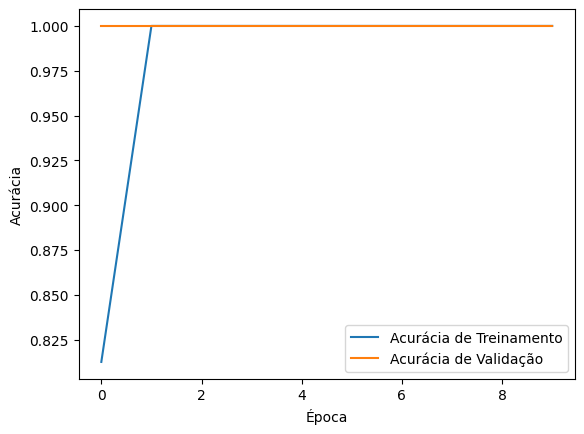

In [ ]:
import matplotlib.pyplot as plt

# Plotar a acurácia e perda ao longo do treinamento
plt.plot(treinamento.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(treinamento.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


# **O gráfico de desempenho geralmente exibe duas métricas principais:**
Acurácia (Accuracy):

Linha de Acurácia de Treinamento: Representa o quão bem o modelo está aprendendo ao longo das épocas (iterações) no conjunto de dados de treinamento.
Linha de Acurácia de Validação: Representa o desempenho do modelo ao aplicar o que aprendeu no conjunto de validação, que são dados separados do treinamento.
Análise:

Se ambas as curvas (treinamento e validação) sobem de maneira estável, isso indica que o modelo está aprendendo de forma eficiente.
Se a curva de validação começa a estagnar ou cair enquanto a curva de treinamento continua subindo, isso pode ser um sinal de overfitting, o que significa que o modelo está aprendendo a se ajustar muito bem ao conjunto de treinamento, mas tem dificuldade em generalizar para novos dados.
Perda (Loss):

Não aparece na célula que mostrei anteriormente, mas normalmente é plotado junto com a acurácia. A perda mede o quão "ruins" as previsões do modelo são. Quanto menor a perda, melhor o modelo está se saindo.

Perda de Treinamento: Mostra a perda (erro) do modelo no conjunto de dados de treinamento ao longo das épocas.

Perda de Validação: Mostra a perda no conjunto de validação, ou seja, o erro do modelo ao prever exemplos que ele não viu durante o treinamento.
